# Coursera Machine Learning -  Week 2 Programming Exercise

 ## Linear Regression with one Variable

 ## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Reading and Wrangling Data

In [2]:
df = pd.read_csv('ex1data1.txt')
df.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
6.1101    96 non-null float64
17.592    96 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
df.columns = ['X', 'Y']
vals = pd.DataFrame([[6.1101, 17.592]], columns=['X','Y'])
df = df.append(vals, ignore_index=True)
df.tail()

,X,Y
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510
95,5.4369,0.61705
96,6.1101,17.59200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
X    97 non-null float64
Y    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


## 3. Plot the Dataset

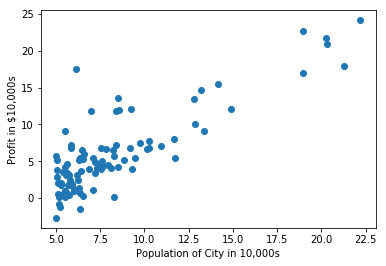

In [6]:
plt.scatter(df.X.values, df.Y.values)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

## 4. Construct Linear Regression Algorithm

### A. Set up global parameters (# training examples, X, Y, theta parameters, iterations, learning rate)

In [7]:
m = len(df.X.values) # Number of training examples

ones = np.ones([m, 1])
x_vals = np.array([df.X.values]).T
X = np.concatenate((ones,x_vals), axis=1) # 97x2 Matrix of X values
Y = np.array([df.Y.values]).T # 97x1 Vector of Y results

theta = np.zeros([2,1]) # Initiatl theta parameters
iterations = 1500 # Number of gradient descent iterations
alpha = 0.01 # Learning Rates

### B. Hypothesis Function

In [8]:
def Hypothesis(x):
    prediction = theta[0]*x[0] + theta[1]*x[1]
    return prediction

Hypothesis([1,1])

array([ 0.])

### C. Cost Function

In [9]:
def CostFunction(x,y):
    _sum_ = 0
    deriv = (1/(2*m))
    for i in range(m):
        _sum_ += (Hypothesis(x[i]) - y[i])**2
    cost = deriv*_sum_
    return cost

# Cost Function with Theta at base 0s
CostFunction(X,Y)

array([ 32.07273388])

### D. Gradient Descent Function

In [10]:
def GradientDescent(x,y):
    print('Starting...')
    for z in range(iterations):
        _sum_ = 0
        
        for i in range(m):
            _sum_ += ((Hypothesis(x[i]) - y[i])*(x[i][0]))
        placeholder1 = theta[0] - (alpha*(1/m)*_sum_)       # Placeholder on theta[0] so that it won't affect next loop
        for i in range(m):
            _sum_ += ((Hypothesis(x[i]) - y[i])*(x[i][1]))
        placeholder2 = theta[1] - (alpha*(1/m)*_sum_)       # Placeholder on theta[1] so that theta can be changed at end 
        
        theta[0] = placeholder1 # Simulatenously changing both theta_0 and theta_1
        theta[1] = placeholder2
        
        if z % 150 == 0:
            print('After %(z)s iterations: %(c)f' % {'z': z, 'c': CostFunction(x,y)})
    print('After %(iter)s iterations: %(c)f' % {'iter': iterations, 'c': CostFunction(x,y)})
    print('Done!')

### E. Run Gradient Descent

In [11]:
GradientDescent(X,Y)

Starting...
After 0 iterations: 6.194415
After 150 iterations: 5.351973
After 300 iterations: 5.011804
After 450 iterations: 4.803880
After 600 iterations: 4.676790
After 750 iterations: 4.599108
After 900 iterations: 4.551625
After 1050 iterations: 4.522603
After 1200 iterations: 4.504863
After 1350 iterations: 4.494020
After 1500 iterations: 4.487426
Done!


### F. Plot the Linear Regression

In [12]:
line = []
for i in range(m):
    line.append(float(Hypothesis(X[i])))
line = pd.Series(line)
line[:5]

0    2.845741
1    6.310252
2    4.554887
3    3.230429
4    6.153064
dtype: float64

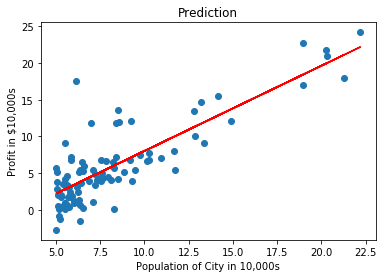

In [13]:
plt.scatter(df.X.values, df.Y.values)
p, = plt.plot(df.X.values, line.values, '-')
p.set_color('r')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Prediction')